# Impact of HbA1c Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database Patient Records

#### Created by: 
Paz Bunis (pazbunis@gmail.com)
#### based on:
Beata Strack, Jonathan P. DeShazo, Chris Gennings, et al., “Impact of HbA1c
Measurement on Hospital Readmission Rates: Analysis of 70,000 Clinical Database
Patient Records,” BioMed Research International, vol. 2014, 11 pages, 2014.

## 0. Imports and Initialization

In [1]:
from matplotlib import style as style
import matplotlib.pyplot as plt
%matplotlib inline
style.use('ggplot')
import pandas as pd
import numpy as np
import scipy.stats as stats
from kmodes import kmodes
from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier
encounters = pd.read_csv('dataset/diabetic_data.csv')
msk = np.random.rand(len(encounters)) < 0.9
encounters_train = encounters[msk]
encounters_test = encounters[~msk]

## 1. Descriptive Statistics
### 1.1. Gender vs. other attributes

#### 1.1.1. Gender vs. Age

AttributeError: 'function' object has no attribute 'bar'

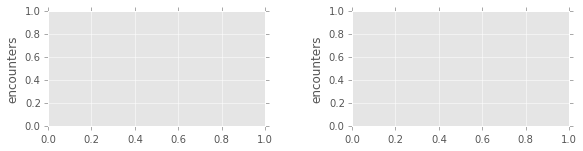

In [2]:
females_age_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('age').size()
males_age_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('age').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_age_grouping.plot.bar(ax = axs[0], title = 'Females')
males_age_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.2. Gender vs. Race

In [ ]:
females_race_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('race').size()
males_race_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('race').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_race_grouping.plot.bar(ax = axs[0], title = 'Females')
males_race_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.3. Gender vs. Readmission Value

In [ ]:
females_readmission_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('readmitted').size()
males_readmission_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('readmitted').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[1].set_ylabel("encounters")
fig.tight_layout(pad=4)
females_readmission_grouping.plot.bar(ax = axs[0], title = 'Females')
males_readmission_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.1.4. Gender vs. Most Frequently Used ICD-9 Codes
(All three diagnosis types are combined to one column)

In [ ]:
fem_diags_projection = encounters_train[encounters_train.gender == 'Female'][['diag_1', 'diag_2', 'diag_3']]
fem_diags_arr = [fem_diags_projection[['diag_1']],fem_diags_projection[['diag_2']],fem_diags_projection[['diag_3']]]
fem_comb_diags = pd.concat(fem_diags_arr, axis=1).stack().reset_index(drop=True)

male_diags_projection = encounters_train[encounters_train.gender == 'Male'][['diag_1', 'diag_2', 'diag_3']]
male_diags_arr = [male_diags_projection[['diag_1']],male_diags_projection[['diag_2']],male_diags_projection[['diag_3']]]
male_comb_diags = pd.concat(male_diags_arr, axis=1).stack().reset_index(drop=True)

fig, axs = plt.subplots(1,2, figsize=(9,4))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("ICD-9 Code")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("ICD-9 Code")
fig.tight_layout(pad=4)
fem_comb_diags.value_counts().head().plot.bar(ax = axs[0], title = 'Females')
male_comb_diags.value_counts().head().plot.bar(ax = axs[1], title = 'Males', color='b')

### 1.2. Days in Hospital and A1c Test Results

#### 1.2.1. Days in Hospital vs. Gender

In [ ]:
females_hospital_time_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('time_in_hospital').size()
males_hospital_time_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('time_in_hospital').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("days")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
females_hospital_time_grouping.plot.bar(ax = axs[0], title = 'Females')
males_hospital_time_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.2.2. Days in Hospital vs. Age Group

In [ ]:
age_group1= encounters_train[encounters_train.age.isin(['[0-10)','[10-20)', '[20-30)', '[30-40)'])]
age_group2= encounters_train[encounters_train.age.isin(['[40-50)', '[50-60)', '[60-70)'])]
age_group3= encounters_train[encounters_train.age.isin(['[70-80)', '[80-90), [90-100)'])]
group1_hospital_time = age_group1.groupby('time_in_hospital').size()
group2_hospital_time = age_group2.groupby('time_in_hospital').size()
group3_hospital_time = age_group3.groupby('time_in_hospital').size()

fig, axs = plt.subplots(1,3, figsize=(9,3))
# axs[0].set_ylabel("encounters")
# axs[0].set_xlabel("days")
# axs[1].set_ylabel("encounters")
# axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
group1_hospital_time.plot.bar(ax = axs[0], title = '[0-40)')
group2_hospital_time.plot.bar(ax = axs[1], title = '[40-70)')
group3_hospital_time.plot.bar(ax = axs[2], title = '[70-100)')

#### 1.2.3. A1c test results vs. Gender

In [ ]:
females_A1C_grouping = encounters_train[encounters_train.gender == 'Female'].groupby('A1Cresult').size()
males_A1C_grouping = encounters_train[encounters_train.gender == 'Male'].groupby('A1Cresult').size()
fig, axs = plt.subplots(1,2, figsize=(9,3))
axs[0].set_ylabel("encounters")
axs[0].set_xlabel("days")
axs[1].set_ylabel("encounters")
axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
females_A1C_grouping.plot.bar(ax = axs[0], title = 'Females')
males_A1C_grouping.plot.bar(ax = axs[1], title = 'Males', color='b')

#### 1.2.4. A1c test results vs. Age Group

In [ ]:
age_group1= encounters_train[encounters_train.age.isin(['[0-10)','[10-20)', '[20-30)', '[30-40)'])]
age_group2= encounters_train[encounters_train.age.isin(['[40-50)', '[50-60)', '[60-70)'])]
age_group3= encounters_train[encounters_train.age.isin(['[70-80)', '[80-90), [90-100)'])]
group1_hospital_time = age_group1.groupby('A1Cresult').size()
group2_hospital_time = age_group2.groupby('A1Cresult').size()
group3_hospital_time = age_group3.groupby('A1Cresult').size()

fig, axs = plt.subplots(1,3, figsize=(9,3))
# axs[0].set_ylabel("encounters")
# axs[0].set_xlabel("days")
# axs[1].set_ylabel("encounters")
# axs[1].set_xlabel("days")

fig.tight_layout(pad=4)
group1_hospital_time.plot.bar(ax = axs[0], title = '[0-40)')
group2_hospital_time.plot.bar(ax = axs[1], title = '[40-70)')
group3_hospital_time.plot.bar(ax = axs[2], title = '[70-100)')

### 1.3. Other Results

In [ ]:
# TODO: add more Descriptive Statistics

## 2. Hypothesis Testing

### 2.1. Is Testing HbA1c  Associated With a Reduced Rate of Readmission?
Our null hypothesis $H_0$ is that there is no correlation between the HbA1c test and the rate of readmission.
In order to test this, we will use the Fisher exact test and the Chi-square test (which is supposed to be better for larger numbers).

In [ ]:
proj = encounters_train[['A1Cresult', 'readmitted']]
ct = pd.crosstab(proj.A1Cresult, proj.readmitted, margins=True)
ct['readmitted'] = ct['<30'] 
ct['not_readmitted'] = ct['>30'] + ct['NO']
ct = ct[['readmitted', 'not_readmitted', 'All']]
N_readmitted_tested = ct.readmitted.All - ct.readmitted['None']
N_readmitted_not_tested = ct.readmitted['None']
N_not_readmitted_tested = ct.not_readmitted.All - ct.not_readmitted['None']
N_not_readmitted_not_tested = ct.not_readmitted['None']

print(ct)

####  Fisher Exact Test 

In [ ]:
contingency_table = [[N_readmitted_tested, N_readmitted_not_tested],[N_not_readmitted_tested, N_not_readmitted_not_tested]]
odds_ratio, p_val = scipy.stats.fisher_exact(contingency_table)
print('Odds ratio: ' + str(odds_ratio))
print('P-value: ' + str(p_val))

As we see here, we get $p < 0.001$ and an odds-ratio which is significantly lower than 1, so we should reject the null hypothesis.


####  Chi-Square Test

In [ ]:
statistic, p_val, _, _ =scipy.stats.chi2_contingency(contingency_table, correction=True)
print('Statistic value: ' + str(statistic))
print('P-value: ' + str(p_val))

We got a high $\chi^2$ value and $p < 0.001$, so we again conclude that we should reject the null hypothesis.

### 2.2. Is Drug Prescription or Dosage Change Associated With a Reduced Rate of Readmission? 


Our null hypothesis  $H_0$  is that there is no correlation between drug prescription or dosage change and the rate of readmission. 
As before, we use the Fisher exact test and the Chi-square test for added robustness. 

In [ ]:
drug_change_columns = ['metformin', 'repaglinide', 'nateglinide', 'chlorpropamide', 'glimepiride', 'acetohexamide', 
                       'glipizide', 'glyburide', 'tolbutamide', 'pioglitazone', 'rosiglitazone', 'acarbose', 
                       'miglitol', 'troglitazone', 'tolazamide', 'examide', 'citoglipton', 'insulin', 
                       'glyburide-metformin', 'glipizide-metformin', 'glimepiride-pioglitazone', 
                       'metformin-rosiglitazone', 'metformin-pioglitazone', 'diabetesMed']
drug_df = encounters_train[drug_change_columns]
indicators = drug_df.apply(lambda x: ("Up" in x) or (x.diabetesMed == "Yes"), axis=1) 
df = pd.DataFrame(data = {'prescribed_or_upped': indicators, 'readmitted': encounters_train['readmitted']})
ct = pd.crosstab(df.prescribed_or_upped, df.readmitted, margins=True)
ct['readmitted'] = ct['<30'] 
ct['not_readmitted'] = ct['>30'] + ct['NO']
ct = ct[['readmitted', 'not_readmitted', 'All']]
print(ct)
N_readmitted_prescribed_or_upped = ct.readmitted[True]
N_readmitted_not_prescribed_or_upped = ct.readmitted[False]
N_not_readmitted_prescribed_or_upped = ct.not_readmitted[True]
N_not_readmitted_not_prescribed_or_upped = ct.not_readmitted[False]

####  Fisher Exact Test

In [ ]:
contingency_table = [[N_readmitted_prescribed_or_upped, N_readmitted_not_prescribed_or_upped],
                     [N_not_readmitted_prescribed_or_upped, N_not_readmitted_not_prescribed_or_upped]]
odds_ratio, p_val = stats.fisher_exact(contingency_table)
print('Odds ratio: ' + str(odds_ratio))
print('P-value: ' + str(p_val))

As we see here, we get $p < 0.001$ and an odds-ratio which is significantly higher than 1, so we should reject the null hypothesis.

####  Chi-Square Test

In [ ]:
statistic, p_val, _, _ = stats.chi2_contingency(contingency_table, correction=True)
print('Statistic value: ' + str(statistic))
print('P-value: ' + str(p_val))

We got a high $\chi^2$ value and $p < 0.001$, so we again conclude that we should reject the null hypothesis.

## 3.Clustering and Similarity

### 3.1. Defining a Metric 

Since we are clustreting categorical data, one logical option is using the following metric:

Let $X,Y$ be two rows of length $k$ in the data set. Assume that for all $i \in [k]$, $X_i,Y_i \in A_i$ ($A_i$ is a categorical field, for example the 'readmitted' field).

Then: $d(X,Y)= \sum_i \mathbb{1}[X_i \neq Y_i]$

A cluster centroid will be a point $C \in A_1 \times A_2 \times ... \times A_k$.

### 3.2.  Using K-Modes to Cluster Patients

K-modes is a clustering algorithm which uses the metric defined above, and is closely related to K-Means.

It uses the same type of expectation-maximization steps, but updates the centroids at each iteration by the "mode" of the categories, which is the category that has the highest count (within the cluster).

For example, if $\{X^1, X^2, X^3\}$ are one cluster with centroid $C$, then our update will be:
$$C_i=argmax_{c \in A_i} (\mathbb{1}[X^{1}_{i} = c]+ \mathbb{1}[X^{2}_{i} = c] + \mathbb{1}[X^{3}_{i} = c])$$

In [ ]:
# cluster_df = pd.DataFrame({'res': encounters_train[['A1Cresult']]}, dtype="category")
diag_1 = encounters_train[['diag_1']]['diag_1'].astype("category")
diag_2 = encounters_train[['diag_2']]['diag_2'].astype("category")
diag_3 = encounters_train[['diag_3']]['diag_3'].astype("category")
A1Cres = encounters_train[['A1Cresult']]['A1Cresult'].astype("category")
readmitted = encounters_train[['readmitted']]['readmitted'].astype("category")

cols = {'diag_1': diag_1, 'diag_2': diag_2, 'diag_3': diag_3,
        'A1Cres': A1Cres, 'readmitted': readmitted}
cluster_df = pd.DataFrame(data = cols, dtype="category")
c1 = np.array(cluster_df.diag_1.cat.codes)
c2 = np.array(cluster_df.diag_2.cat.codes)
c3 = np.array(cluster_df.diag_3.cat.codes)
c4 = np.array(cluster_df.A1Cres.cat.codes)
c5 = np.array(cluster_df.readmitted.cat.codes)
t = np.matrix([c1, c2, c3, c4, c5]).transpose()
km = kmodes.KModes(n_clusters=4, init='Huang', n_init=5, verbose=1)
clusters = km.fit_predict(t)
print(km.cluster_centroids_)

Since we are going to cluster categorical data, a logical choice is to use the K-Modes algorithm.
The algorithm uses the following metric:
Let 


The specificts are at:

    (1, 2) Huang, Z.: Clustering large data sets with mixed numeric and categorical values, Proceedings of the First Pacific Asia Knowledge Discovery and Data Mining Conference, Singapore, pp. 21-34, 1997.


In [ ]:
# get index<->category mappings:
A1Cres_dict = dict( enumerate(cluster_df.A1Cres.cat.categories) )
readmitted_dict = dict( enumerate(cluster_df.readmitted.cat.categories) )

In [ ]:
centroids = pd.DataFrame(km.cluster_centroids_)
print('Clusters (rows are clusters, columns are diag_1, diag_2, diag_3, A1Cresult, readmitted):')
print(centroids)
# Cluster info:
cluster_labels = pd.Series(clusters, dtype="category")
print('\nCluster sizes:')
cluster_labels.groupby(cluster_labels).count()

We got 4 pretty big clusters, and their centroids are described above (each row is a centroid).

## 4. Prediction

Divide the training data into 10 folds for cross-validation:

In [3]:
kf = KFold(n_splits=10, shuffle=True)
fold_idxs = []
for train_idxs, test_idxs in kf.split(encounters_train):
    fold_idxs.append({'train' : train_idxs, 'test': test_idxs})

### 4.1. Naïve Bayes

#### 4.1.1. Binary Classification

##### Validation

In [ ]:
from sklearn.naive_bayes import MultinomialNB
clf = MultinomialNB()
scores = []
for fold in fold_idxs:
    train_facts = encounters_train.iloc[fold['train']].copy()
    test_facts = encounters_train.iloc[fold['test']].copy()
    cats_to_factorize = ['race', 'gender', 'age', 'weight', 'change', 'diabetesMed', 'A1Cresult']
    train_facts[cats_to_factorize] = train_facts[cats_to_factorize].apply(lambda x: pd.factorize(x)[0]) 
    test_facts[cats_to_factorize] = test_facts[cats_to_factorize].apply(lambda x: pd.factorize(x)[0]) 
    features = ['race', 'gender', 'age', 'weight', 'change', 'diabetesMed', 'A1Cresult']
    y_train_bool = train_facts.readmitted == '<30'
    y_train = y_train_bool.values
    X_train = train_facts[features].values
    y_test_bool = test_facts.readmitted == '<30'
    y_test = y_test_bool.values
    X_test = test_facts[features].values
    clf.fit(X_train,y_train)
    scores.append(clf.score(X_test, y_test))
print('Average: ' + str(np.average(scores)))
print('Variance: ' + str(np.var(scores)))

##### Test

In [ ]:
clf = MultinomialNB()
train_facts = encounters_train.copy()
test_facts = encounters_test.copy()
cats_to_factorize = ['race', 'gender', 'age', 'weight', 'change', 'diabetesMed', 'A1Cresult']
train_facts[cats_to_factorize] = train_facts[cats_to_factorize].apply(lambda x: pd.factorize(x)[0]) 
test_facts[cats_to_factorize] = test_facts[cats_to_factorize].apply(lambda x: pd.factorize(x)[0]) 
features = ['race', 'gender', 'age', 'weight', 'change', 'diabetesMed', 'A1Cresult']
y_train_bool = train_facts.readmitted == '<30'
y_train = y_train_bool.values
X_train = train_facts[features].values
y_test_bool = test_facts.readmitted == '<30'
y_test = y_test_bool.values
X_test = test_facts[features].values
clf.fit(X_train,y_train)

print('Test accuracy: ' + str(clf.score(X_test, y_test)))

We got test accuracy of $0.89$.

#### 4.1.2. General Classification

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix 
clf = MultinomialNB(class_prior = [0.05,0.6,0.35])
conf_mat = np.zeros((3,3))

for fold in fold_idxs:
    train_facts = encounters_train.iloc[fold['train']].copy()
    test_facts = encounters_train.iloc[fold['test']].copy()
    cats_to_factorize = ['A1Cresult', 'diabetesMed', 'readmitted']
    train_facts[cats_to_factorize] = train_facts[cats_to_factorize].apply(lambda x: pd.factorize(x)[0]) 
    test_facts[cats_to_factorize] = test_facts[cats_to_factorize].apply(lambda x: pd.factorize(x)[0]) 
    features = ['A1Cresult']
    y_train = train_facts.readmitted.values
    X_train = train_facts[features].values
    y_test = test_facts.readmitted.values
    X_test = test_facts[features].values
    clf.fit(X_train,y_train)
    conf_mat += confusion_matrix(y_test, clf.predict(X_test))
print(conf_mat)

After trying many different combinations of features, it seems that naïve bayes isn't the right choice for this task.

In [ ]:
clf = MultinomialNB(class_prior = [0.05,0.6,0.35])
conf_mat = np.zeros((3,3))

train_facts = encounters_train.copy()
test_facts = encounters_test.copy()
cats_to_factorize = ['A1Cresult', 'diabetesMed', 'readmitted']
train_facts[cats_to_factorize] = train_facts[cats_to_factorize].apply(lambda x: pd.factorize(x)[0]) 
test_facts[cats_to_factorize] = test_facts[cats_to_factorize].apply(lambda x: pd.factorize(x)[0]) 
features = ['A1Cresult']
y_train = train_facts.readmitted.values
X_train = train_facts[features].values
y_test = test_facts.readmitted.values
X_test = test_facts[features].values
clf.fit(X_train,y_train)
conf_mat += confusion_matrix(y_test, clf.predict(X_test))
print(conf_mat)

We see that also on the test data our naïve bayes classifier isn't very accurate.

### 4.2. K-Nearest Neighbors

For this task I am going to convert all the data to numerical data so I can use the Euclidean distance as a metric.
This will be accomplished by defining "dummy variables" for the categorial data and leaving the numeric data as is.

In [4]:
def icd9_to_cat(icd9_code):
    try:
        num = float(icd9_code)
        if 1 <= num and num <= 139: 
            return 0
        if 140 <= num and num <= 239: 
            return 1
        if 240 <= num and num <= 279: 
            return 2      
        if 280 <= num and num <= 289: 
            return 3       
        if 280 <= num and num <= 289: 
            return 4
        if 290 <= num and num <= 319:
            return 5
        if 320 <= num and num <= 359: 
            return 6
        if 360 <= num and num <= 389:
            return 7
        if 390 <= num and num <= 459: 
            return 8
        if 460 <= num and num <= 519:
            return 9
        if 520 <= num and num <= 579: 
            return 10
        if 580 <= num and num <= 629:
            return 11
        if 630 <= num and num <= 679:
            return 12
        if 680 <= num and num <= 709:
            return 13
        if 710 <= num and num <= 739:
            return 14
        if 740 <= num and num <= 759:
            return 15
        if 760 <= num and num <= 779:
            return 16
        if 780 <= num and num <= 799:
            return 17
        if 800 <= num and num <= 999:
            return 18
    except ValueError:
        return 20
    
def het_data_to_numerical(sample_data, numer_features, cat_features):
    df = pd.DataFrame()
    cat_dfs = []
    for cat_feat in cat_features:
        cat_dfs.append(pd.get_dummies(sample_data[cat_feat], prefix=cat_feat))
    raw_cat =  pd.concat([sample_data[numer_features]] + cat_dfs + [sample_data['readmitted']], axis=1)
    return raw_cat.fillna(-1)

#### 4.2.1. Binary Classification

##### Validation

In [6]:
from sklearn.neighbors import KNeighborsClassifier

cat_features = ['A1Cresult', 'insulin', 'change', 'diabetesMed', 'diag_1', 'diag_2']
numer_features = ['number_emergency', 'num_procedures']
all_features = cat_features + numer_features

accs = []
for fold in fold_idxs:
    train = encounters_train.iloc[fold['train']].copy()
    test = encounters_train.iloc[fold['test']].copy()
    train['diag_1'] = train['diag_1'].apply(icd9_to_cat)
    train['diag_2'] = train['diag_2'].apply(icd9_to_cat)
    train['diag_3'] = train['diag_3'].apply(icd9_to_cat)
    test['diag_1'] = test['diag_1'].apply(icd9_to_cat)
    test['diag_2'] = test['diag_2'].apply(icd9_to_cat)
    test['diag_3'] = test['diag_3'].apply(icd9_to_cat)
    train_reduced = het_data_to_numerical(train, numer_features, cat_features)
    test_reduced = het_data_to_numerical(test, numer_features, cat_features)
    comb_feat = list(set.intersection(set(train_reduced.columns), set(test_reduced.columns)) - {'readmitted'})
    X_train = train_reduced[comb_feat]
    y_train = train.readmitted == '<30'
    y_train = y_train

    X_test = test_reduced[comb_feat]
    y_test = test.readmitted == '<30'
    y_test = y_test

    neigh = KNeighborsClassifier(n_neighbors=3)
    print('train fold')
    neigh.fit(X_train, y_train)
    print('test fold')
    accs.append(neigh.score(X_test, y_test))

train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold


In [7]:
print('Average: ' + str(np.average(accs)))
print('std: ' + str(np.std(accs)))

Average: 0.862555349899
std: 0.00417119721603


##### test

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

cat_features = ['A1Cresult', 'insulin', 'change', 'diabetesMed', 'diag_1', 'diag_2']
numer_features = ['number_emergency', 'num_procedures']
all_features = cat_features + numer_features

train = encounters_train.copy()
test = encounters_test.copy()
train['diag_1'] = train['diag_1'].apply(icd9_to_cat)
train['diag_2'] = train['diag_2'].apply(icd9_to_cat)
train['diag_3'] = train['diag_3'].apply(icd9_to_cat)
test['diag_1'] = test['diag_1'].apply(icd9_to_cat)
test['diag_2'] = test['diag_2'].apply(icd9_to_cat)
test['diag_3'] = test['diag_3'].apply(icd9_to_cat)
train_reduced = het_data_to_numerical(train, numer_features, cat_features)
test_reduced = het_data_to_numerical(test, numer_features, cat_features)
comb_feat = list(set.intersection(set(train_reduced.columns), set(test_reduced.columns)) - {'readmitted'})
X_train = train_reduced[comb_feat]
y_train = train.readmitted == '<30'
y_train = y_train

X_test = test_reduced[comb_feat]
y_test = test.readmitted == '<30'
y_test = y_test

neigh = KNeighborsClassifier(n_neighbors=3)
print('train final')
neigh.fit(X_train, y_train)
print('test final')
print('accuracy: ' + str(neigh.score(X_test, y_test)))

#### 4.2.2. General Classification

##### validation

In [16]:
cat_features = ['A1Cresult', 'insulin', 'change', 'diabetesMed', 'diag_1', 'diag_2']
numer_features = ['number_emergency', 'num_procedures']
all_features = cat_features + numer_features

conf_mat = np.zeros((3,3))
for fold in fold_idxs:
    train = encounters_train.iloc[fold['train']].copy()
    test = encounters_train.iloc[fold['test']].copy()
    train['diag_1'] = train['diag_1'].apply(icd9_to_cat)
    train['diag_2'] = train['diag_2'].apply(icd9_to_cat)
    train['diag_3'] = train['diag_3'].apply(icd9_to_cat)
    test['diag_1'] = test['diag_1'].apply(icd9_to_cat)
    test['diag_2'] = test['diag_2'].apply(icd9_to_cat)
    test['diag_3'] = test['diag_3'].apply(icd9_to_cat)
    train_reduced = het_data_to_numerical(train, numer_features, cat_features)
    test_reduced = het_data_to_numerical(test, numer_features, cat_features)
    comb_feat = list(set.intersection(set(train_reduced.columns), set(test_reduced.columns)) - {'readmitted'})
    X_train = train_reduced[comb_feat]
    y_train = train.readmitted

    X_test = test_reduced[comb_feat]
    y_test = test.readmitted
    neigh = KNeighborsClassifier(n_neighbors=3)
    print('train fold')
    neigh.fit(X_train, y_train)
    print('test fold')
    accs.append(neigh.score(X_test, y_test))
    conf_mat += confusion_matrix(y_test, neigh.predict(X_test))
print(conf_mat)

train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
[[  1841.   3387.   4999.]
 [  5241.  10537.  16118.]
 [  7406.  14166.  27760.]]


##### test

In [17]:
cat_features = ['A1Cresult', 'insulin', 'change', 'diabetesMed', 'diag_1', 'diag_2']
numer_features = ['number_emergency', 'num_procedures']
all_features = cat_features + numer_features

conf_mat = np.zeros((3,3))

train = encounters_train.copy()
test = encounters_test.copy()
train['diag_1'] = train['diag_1'].apply(icd9_to_cat)
train['diag_2'] = train['diag_2'].apply(icd9_to_cat)
train['diag_3'] = train['diag_3'].apply(icd9_to_cat)
test['diag_1'] = test['diag_1'].apply(icd9_to_cat)
test['diag_2'] = test['diag_2'].apply(icd9_to_cat)
test['diag_3'] = test['diag_3'].apply(icd9_to_cat)
train_reduced = het_data_to_numerical(train, numer_features, cat_features)
test_reduced = het_data_to_numerical(test, numer_features, cat_features)
comb_feat = list(set.intersection(set(train_reduced.columns), set(test_reduced.columns)) - {'readmitted'})
X_train = train_reduced[comb_feat]
y_train = train.readmitted

X_test = test_reduced[comb_feat]
y_test = test.readmitted
neigh = KNeighborsClassifier(n_neighbors=3)
print('train final')
neigh.fit(X_train, y_train)
print('test final')
accs.append(neigh.score(X_test, y_test))
conf_mat += confusion_matrix(y_test, neigh.predict(X_test))
print(conf_mat)

train final
test final
[[  189.   390.   551.]
 [  625.  1205.  1819.]
 [  859.  1653.  3020.]]


### 4.3. Random Forest

#### 4.3.1. Binary Classification

##### validation

In [8]:
r = RandomForestClassifier(n_estimators=100)
cat_features = ['A1Cresult', 'insulin', 'change', 'diabetesMed', 'diag_1', 'diag_2']
numer_features = ['number_emergency', 'num_procedures']
all_features = cat_features + numer_features

accs = []
for fold in fold_idxs:
    train = encounters_train.iloc[fold['train']].copy()
    test = encounters_train.iloc[fold['test']].copy()
    train['diag_1'] = train['diag_1'].apply(icd9_to_cat)
    train['diag_2'] = train['diag_2'].apply(icd9_to_cat)
    train['diag_3'] = train['diag_3'].apply(icd9_to_cat)
    test['diag_1'] = test['diag_1'].apply(icd9_to_cat)
    test['diag_2'] = test['diag_2'].apply(icd9_to_cat)
    test['diag_3'] = test['diag_3'].apply(icd9_to_cat)
    train_reduced = het_data_to_numerical(train, numer_features, cat_features)
    test_reduced = het_data_to_numerical(test, numer_features, cat_features)
    comb_feat = list(set.intersection(set(train_reduced.columns), set(test_reduced.columns)) - {'readmitted'})
    X_train = train_reduced[comb_feat]
    y_train = train.readmitted == '<30'
    y_train = y_train

    X_test = test_reduced[comb_feat]
    y_test = test.readmitted == '<30'
    y_test = y_test

    print('train fold')
    r.fit(X_train, y_train)
    print('test fold')
    accs.append(r.score(X_test, y_test))
print('Average: ' + str(np.average(accs)))
print('std: ' + str(np.std(accs)))

train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
Average: 0.878355553318
std: 0.00357578463025


##### test

In [9]:
r = RandomForestClassifier(n_estimators=100)
cat_features = ['A1Cresult', 'insulin', 'change', 'diabetesMed', 'diag_1', 'diag_2']
numer_features = ['number_emergency', 'num_procedures']
all_features = cat_features + numer_features

train = encounters_train.copy()
test = encounters_test.copy()
train['diag_1'] = train['diag_1'].apply(icd9_to_cat)
train['diag_2'] = train['diag_2'].apply(icd9_to_cat)
train['diag_3'] = train['diag_3'].apply(icd9_to_cat)
test['diag_1'] = test['diag_1'].apply(icd9_to_cat)
test['diag_2'] = test['diag_2'].apply(icd9_to_cat)
test['diag_3'] = test['diag_3'].apply(icd9_to_cat)
train_reduced = het_data_to_numerical(train, numer_features, cat_features)
test_reduced = het_data_to_numerical(test, numer_features, cat_features)
comb_feat = list(set.intersection(set(train_reduced.columns), set(test_reduced.columns)) - {'readmitted'})
X_train = train_reduced[comb_feat]
y_train = train.readmitted == '<30'
y_train = y_train

X_test = test_reduced[comb_feat]
y_test = test.readmitted == '<30'
y_test = y_test

print('train final')
r.fit(X_train, y_train)
print('test final')
print('accuracy: ' + str(r.score(X_test, y_test)))


train final
test final
accuracy: 0.879740083406


And our accuracy is $0.88$

#### 4.3.2. General Classification

##### validation

In [11]:
from sklearn.metrics import confusion_matrix 

r = RandomForestClassifier(n_estimators=50)
cat_features = ['A1Cresult', 'insulin', 'change', 'diabetesMed', 'diag_1', 'diag_2']
numer_features = ['number_emergency', 'num_procedures']
all_features = cat_features + numer_features

conf_mat = np.zeros((3,3))
for fold in fold_idxs:
    train = encounters_train.iloc[fold['train']].copy()
    test = encounters_train.iloc[fold['test']].copy()
    train['diag_1'] = train['diag_1'].apply(icd9_to_cat)
    train['diag_2'] = train['diag_2'].apply(icd9_to_cat)
    train['diag_3'] = train['diag_3'].apply(icd9_to_cat)
    test['diag_1'] = test['diag_1'].apply(icd9_to_cat)
    test['diag_2'] = test['diag_2'].apply(icd9_to_cat)
    test['diag_3'] = test['diag_3'].apply(icd9_to_cat)
    train_reduced = het_data_to_numerical(train, numer_features, cat_features)
    test_reduced = het_data_to_numerical(test, numer_features, cat_features)
    comb_feat = list(set.intersection(set(train_reduced.columns), set(test_reduced.columns)) - {'readmitted'})
    X_train = train_reduced[comb_feat]
    y_train = train.readmitted

    X_test = test_reduced[comb_feat]
    y_test = test.readmitted

    print('train fold')
    r.fit(X_train, y_train)
    print('test fold')
    conf_mat += confusion_matrix(y_test, r.predict(X_test))    
print('Confusion matrix:')
print(conf_mat)

train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
train fold
test fold
Confusion matrix:
[[   348.   2641.   7238.]
 [   868.   8075.  22953.]
 [  1037.   9331.  38964.]]


We see that the sum of the confusion matrices isn't ideal.

##### test

In [13]:
r = RandomForestClassifier(n_estimators=50)
cat_features = ['A1Cresult', 'insulin', 'change', 'diabetesMed', 'diag_1', 'diag_2']
numer_features = ['number_emergency', 'num_procedures']
all_features = cat_features + numer_features

conf_mat = np.zeros((3,3))
train = encounters_train.copy()
test = encounters_train.copy()
train['diag_1'] = train['diag_1'].apply(icd9_to_cat)
train['diag_2'] = train['diag_2'].apply(icd9_to_cat)
train['diag_3'] = train['diag_3'].apply(icd9_to_cat)
test['diag_1'] = test['diag_1'].apply(icd9_to_cat)
test['diag_2'] = test['diag_2'].apply(icd9_to_cat)
test['diag_3'] = test['diag_3'].apply(icd9_to_cat)
train_reduced = het_data_to_numerical(train, numer_features, cat_features)
test_reduced = het_data_to_numerical(test, numer_features, cat_features)
comb_feat = list(set.intersection(set(train_reduced.columns), set(test_reduced.columns)) - {'readmitted'})
X_train = train_reduced[comb_feat]
y_train = train.readmitted

X_test = test_reduced[comb_feat]
y_test = test.readmitted

print('train final')
r.fit(X_train, y_train)
print('test final')
conf_mat += confusion_matrix(y_test, r.predict(X_test))    

print('Confusion matrix:')
print(conf_mat)

train final
test final
Confusion matrix:
[[  2013.   1896.   6318.]
 [   303.  12792.  18801.]
 [   342.   5518.  43472.]]


**This already looks good - the main diagonal has the highest values with a big gap!**